# K Nearest Neighbours (KNN) Implementation



### Data Exploration and Preparation


In [1]:
# import and explore dataset

applc <- read.csv("un_applic_ binary.csv", header=TRUE)
str(applc)
head(applc)
summary(applc)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [2]:
# change 'admit' to a factor variable

applc$admit <- as.factor(applc$admit)
str(applc)

'data.frame':	400 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 2 1 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [3]:
# Normalise independent variables 

normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

applc$gre <- normalize(applc$gre)
applc$gpa <- normalize(applc$gpa)
applc$rank <- normalize(applc$rank)

# look at normalised variables

head(applc)

,admit,gre,gpa,rank
,<fct>,<dbl>,<dbl>,<dbl>
1,0,0.2758621,0.7758621,0.6666667
2,1,0.7586207,0.8103448,0.6666667
3,1,1.0000000,1.0000000,0.0000000
4,1,0.7241379,0.5344828,1.0000000
5,0,0.5172414,0.3850575,1.0000000
6,1,0.9310345,0.4252874,0.3333333


In [4]:
## split data into train and test (80%, 20%)
# Total number of rows in the data

n <- nrow(applc)

In [5]:
# Number of rows for the training set (80% of the dataset)
n_train <- round(0.80 * n) 

# Create a vector of indices (80% random sample)

set.seed(123)
train_indices <- sample(1:n, n_train)

# Subset the data to training indices only, to create train set
applc_train <- applc[train_indices, ]  
  
# Exclude the training indices, to create the test set (20% of the dataset)
applc_test <- applc[-train_indices, ]


str(applc_train)
str(applc_test)

'data.frame':	320 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 1 2 ...
 $ gre  : num  0.69 0.828 0.655 0.621 0.828 ...
 $ gpa  : num  0.615 0.471 0.695 0.69 0.839 ...
 $ rank : num  0.667 0.333 0.333 1 0.333 ...
'data.frame':	80 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 2 1 1 2 ...
 $ gre  : num  0.276 1 0.931 0.828 0.966 ...
 $ gpa  : num  0.776 1 0.425 1 0.925 ...
 $ rank : num  0.667 0 0.333 0 1 ...


In [7]:
# use bothsampling method to create balanced classes in target (using train data)

#install.packages("ROSE")
library(ROSE)

boths <- ovun.sample(admit~., data = applc_train, method="both",
                     p = 0.5,
                     seed = 123,
                     N = 320)$data

# look at the balanced classes in target "admit" (train data)

table(boths$admit)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)




  0   1 
167 153 

### Building and Training the KNN Model


In [8]:
library(lattice)
library(ggplot2)

In [9]:
library(caret)
library(e1071)

In [10]:
# specify "trainControl", and build KNN model using train set

trControl <- trainControl(method = "repeatedcv",
                          number = 10,
                          repeats = 5)
set.seed(222)
knn_model <- train(admit ~ .,
                     data = boths,
                     method = 'knn',
                     tuneLength = 20,
                     trControl = trControl)

print(knn_model)
summary(knn_model)

k-Nearest Neighbors 

320 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 288, 289, 288, 287, 288, 288, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6203281  0.2438111
   7  0.5917070  0.1846589
   9  0.5874835  0.1761649
  11  0.5944000  0.1886869
  13  0.6021383  0.2007107
  15  0.5826161  0.1615813
  17  0.6003745  0.1994410
  19  0.5982056  0.1940406
  21  0.6133138  0.2239940
  23  0.6120839  0.2218631
  25  0.6140549  0.2253038
  27  0.6084262  0.2143623
  29  0.6183920  0.2340826
  31  0.6213404  0.2397025
  33  0.6145803  0.2269096
  35  0.6137396  0.2240828
  37  0.6306446  0.2588786
  39  0.6370204  0.2724972
  41  0.6302413  0.2588795
  43  0.6413917  0.2815495

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 43.


            Length Class      Mode     
learn       2      -none-     list     
k           1      -none-     numeric  
theDots     0      -none-     list     
xNames      3      -none-     character
problemType 1      -none-     character
tuneValue   1      data.frame list     
obsLevels   2      -none-     character
param       0      -none-     list     

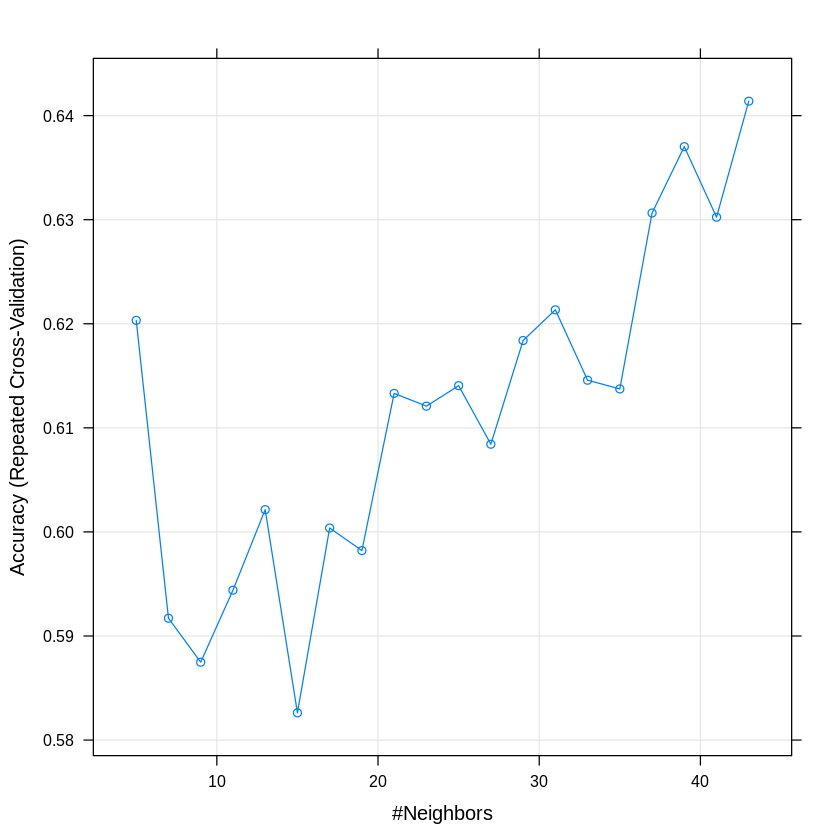

In [14]:
# plot the KNN model to visualise the impact of value of K on accuracy 

plot(knn_model)

In [17]:
#find which variable was the best predictor in the KNN model

varImp(knn_model)

ROC curve variable importance

     Importance
gpa      100.00
gre       89.19
rank       0.00

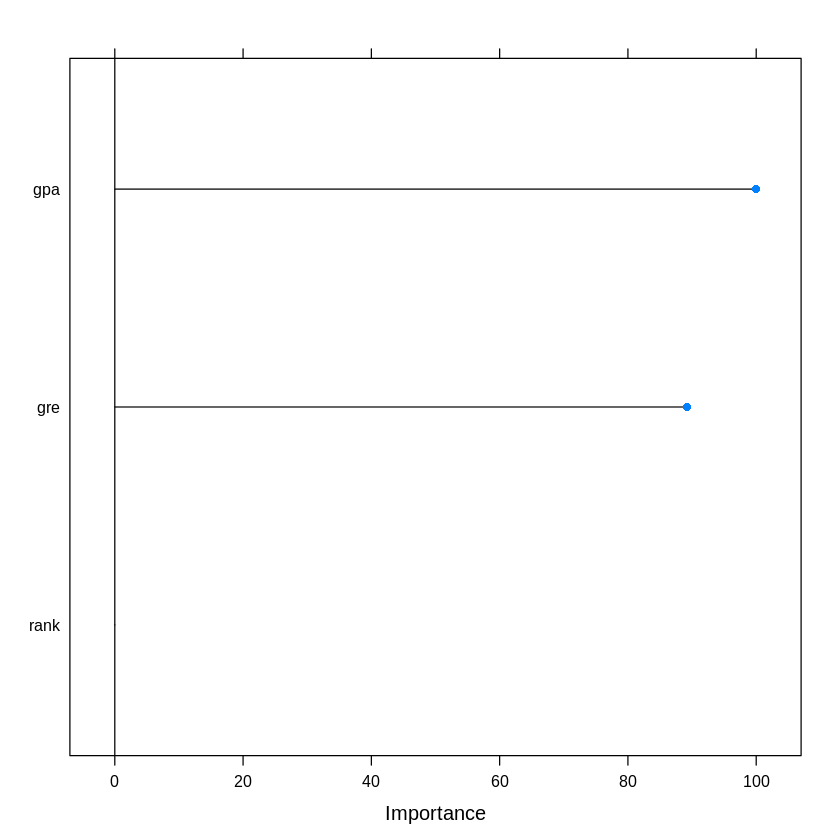

In [18]:
# plot ROC curve variable importance for KNN 

ROC <- varImp(knn_model)

plot(ROC)

### Testing and Evaluating the KNN Performance


In [11]:
# use the KNN model and test data to predict admission "probability"

library(utils)

KNN_pred_prob <- predict(knn_model, newdata = applc_test, type = "prob")

head(KNN_pred_prob)

,0,1
,<dbl>,<dbl>
1,0.7209302,0.2790698
2,0.3488372,0.6511628
3,0.4651163,0.5348837
4,0.2093023,0.7906977
5,0.4418605,0.5581395
6,0.8409091,0.1590909


In [12]:
#install.packages("ROCR")
library(ROCR)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [13]:
library(pROC)
library(Metrics)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘Metrics’


The following object is masked from ‘package:pROC’:

    auc


The following objects are masked from ‘package:caret’:

    precision, recall




In [14]:
# Compute the AUC of KNN_model, using the preditions

auc_knn_model <- auc(actual = applc_test$admit, predicted = KNN_pred_prob[,2])  

# print AUC of KNN_model
                         
print(paste0("KNN_model Test set AUC", auc_knn_model))

[1] "KNN_model Test set AUC0.697177726926011"


In [20]:
#install.packages("caTools")
library(caTools)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



0 vs. 1,0.6971777


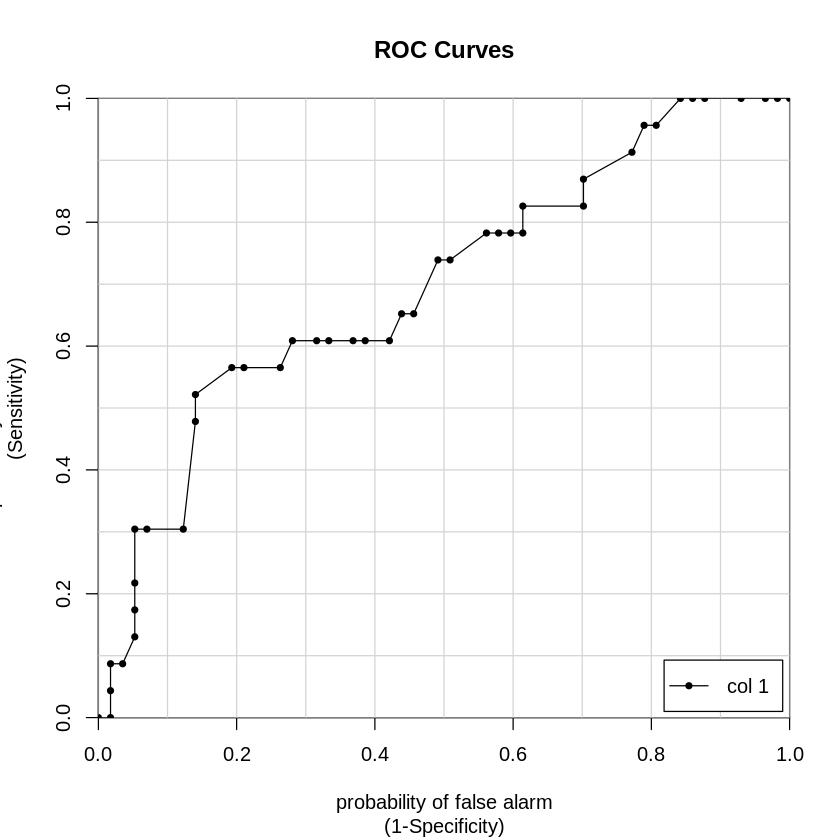

In [21]:
# Plot the KNN ROC curve using the predictions (probabilities)

colAUC(KNN_pred_prob[,2], applc_test[["admit"]], plotROC = TRUE)

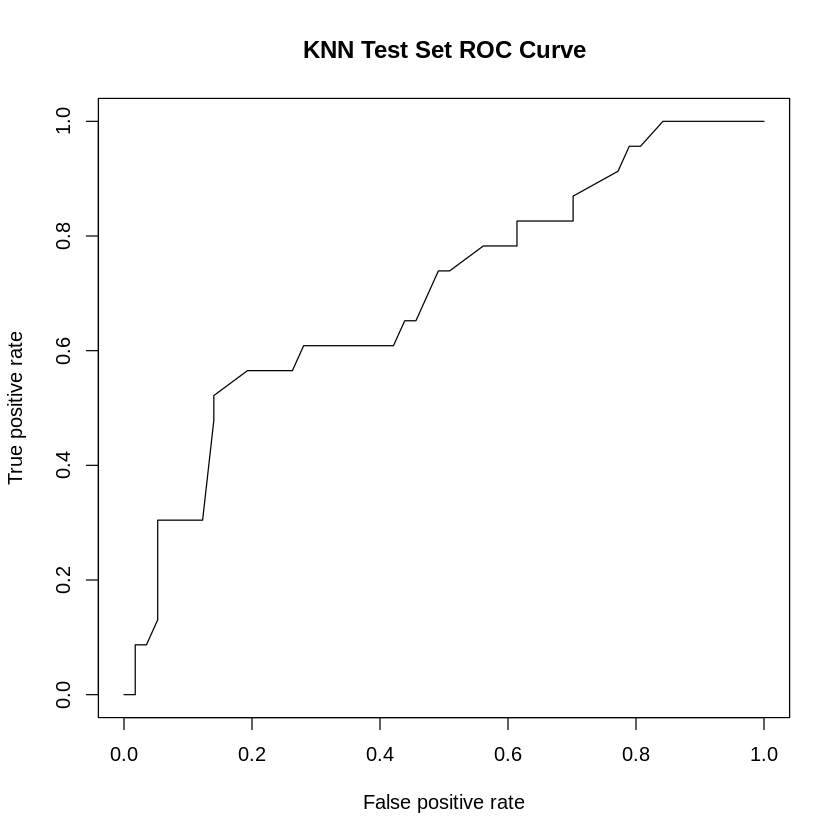

In [93]:
# Plot the KNN ROC curve with another function using the predictions (probabilities)

pred <- prediction(KNN_pred_prob[,2], applc_test$admit)

roc <- performance(pred, "tpr", "fpr")

plot(roc, col = as.list(1), main = "KNN Test Set ROC Curve")

In [15]:
# use the KNN model and test data to predict admission "class"
library(utils)

KNN_pred <- predict(knn_model, newdata = applc_test)

print(KNN_pred)
length(KNN_pred)

 [1] 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0
[39] 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
[77] 1 0 1 1
Levels: 0 1


[1] 80

In [110]:
#install.packages('caret', dependencies = TRUE)
library(caret)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [111]:
library(lattice)
library(ggplot2)

In [112]:
# Measure KNN performance using the confusion matrix and the test set (convert to factor)

cm <- confusionMatrix(data = KNN_pred,       
                reference = applc_test$admit)

print(cm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 37  9
         1 20 14
                                          
               Accuracy : 0.6375          
                 95% CI : (0.5224, 0.7421)
    No Information Rate : 0.7125          
    P-Value [Acc > NIR] : 0.94326         
                                          
                  Kappa : 0.2256          
                                          
 Mcnemar's Test P-Value : 0.06332         
                                          
            Sensitivity : 0.6491          
            Specificity : 0.6087          
         Pos Pred Value : 0.8043          
         Neg Pred Value : 0.4118          
             Prevalence : 0.7125          
         Detection Rate : 0.4625          
   Detection Prevalence : 0.5750          
      Balanced Accuracy : 0.6289          
                                          
       'Positive' Class : 0               
                                    


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




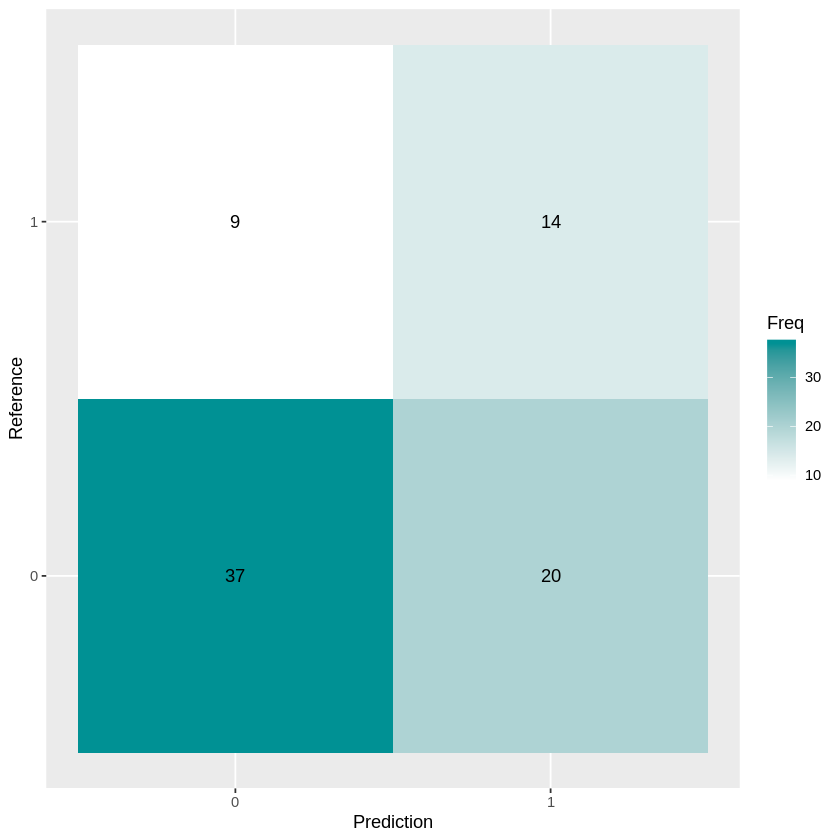

In [113]:
# Plot the confusion Matrix for KNN performance

library(dplyr)

ggplot(as.data.frame(cm$table), aes(Prediction,sort(Reference,decreasing = F), fill= Freq)) +
        geom_tile() + geom_text(aes(label=Freq)) +
        scale_fill_gradient(low="white", high="#009194") +
        labs(x = "Prediction",y = "Reference")


## Evaluation of KNN vs. GBM Performance Using Different Measures




## Definition of Evaluation Measures


#### >> CLASSIFICATION ACCURACY: percentage of correctly classified instances 

#### >> SENSITIVITY: percentage of positive classes (1 = Yes/Admitted) that are classified correctly

#### >> SPECIFICITY: percentage of negative classes (o = No/Not Admitted) that are classified correctly

#### >> AUC: a summary of the ROC curve, that measures the ability of a model to distinguish between the 

#### positive and negative classes (1.0 = perfectly predictive, 0.0 = not predictive)




#### Measures from the Confusion Matrix and AUC (KNN vs. GBM)

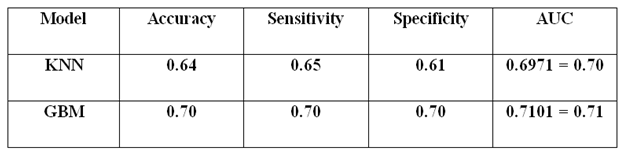








#### Project Findings

##### GBM performed better than KNN based on the overall classification accuracy measures 

##### GBM surpassed KNN in the percentage of positive classes (sensitivity) & the percentage of negative classes (specificity) that are classified correctly

##### Both models were very close to each other in their ability to distinguish between the positive and negative classes (AUC) 
